<a href="https://www.kaggle.com/code/pranitkedarisetty/getting-started-with-titanic-pranit?scriptVersionId=99308483" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Survival Prediction

## Context

On April 15, 1912, the Titanic collided into an iceberg and sank. Out of 2224 passengers and crew on the ship, 1502 of them unfortunately died.

## Objective

The Titanic included many different types of people, which may have played a factor in whether or not each person survived. The object of this project is to create a model that can predict if someone survived the crash based on these various factors.

## Data Overview

Let's start by importing the data and various packages that will help with our analysis and modeling.

Given that we want to predict whether or not someone survived the Titanic crash, we will want to use classification modeling. We will explore both a logistic regression model and a decision tree model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# To build linear model for statistical analysis and prediction
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Import the train data and the test data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Let's see some quick observations we can make in the data.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [7]:
# checking for null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# checking for duplicate values
train_data.duplicated().sum()

0

##### Observations:
- We should remove the PassengerId and Name columns from the data before entering into the model. These variables are unique for every person, so it doesn't make sense to make predictions based off those variables.
- There are no duplicate rows.
- Out of 891 rows in the training data, there are 687 null values for the Cabin column. It probably doesn't make sense to make predictions off of a variable with not much information, so we should just remove that column.
- There are 177 null values for the Age column. I will likely populate the null values with the median value of the Age column.
- There are 2 null values for the Embarked column. I may either keep that as is or populate with the mode value of the Embarked column.
- The Pclass column is currently an int column. This is potentially ok because there is a quantifiable difference between the ticket classes (e.g. 1st is the highest class, 3rd is the lowest class). However, it may be valuable to convert this column to a category column and then one-hot encode it.
- The Fare column will likely have multicollinearity with the Pclass column, because the passenger fare is likely higher for 1st class compared to other classes.
- We should delete the Ticket column. The ticket number value doesn't provide quantifiable difference between rows, and there are 681 unique Ticket column values. Any row that shares ticket numbers are likely in the same party and will be considered from the Sibsp and Parch columns.
- Overall, there is definitely some data cleaning to do. We will do Exploratory Data Analysis to confirm if other data cleaning should occur.

## Exploratory Data Analysis & Data Cleaning

In [9]:
# Remove the PassengerId, Name, Ticket, and Cabin columns
cols = ["PassengerId","Name","Ticket", "Cabin"]
for col in cols:
    train_data = train_data.drop([col], axis=1)

In [10]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Creating a couple functions to help with visualization:

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [13]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [14]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

##### What is the age distribution across the people on the Titanic?

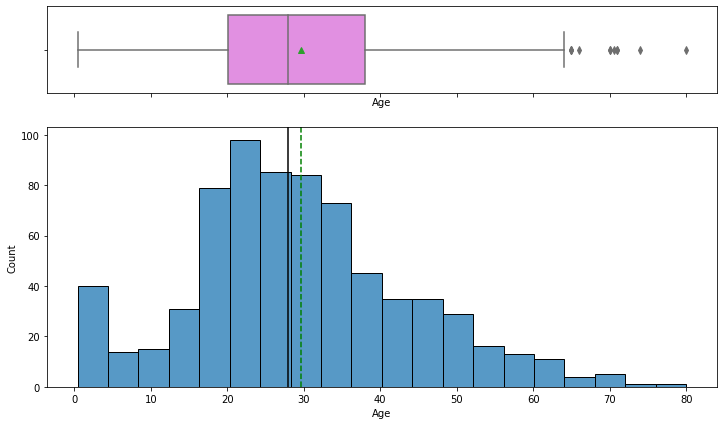

In [15]:
histogram_boxplot(train_data, "Age")

There is a spike in people with age close to zero, which means there are a good number of infants on the ship.

Given that the age distribution is generally a normal distribution with most people being in the 20s and 30s, and the mean being close to the median, I'm comfortable with replacing all the null age values with 30.

In [16]:
train_data['Age'].replace(np.nan,30,inplace=True)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##### Does Port of Embarkation have an impact of survival status of a person?

Survived    0    1  All
Embarked               
All       549  340  889
S         427  217  644
C          75   93  168
Q          47   30   77
------------------------------------------------------------------------------------------------------------------------


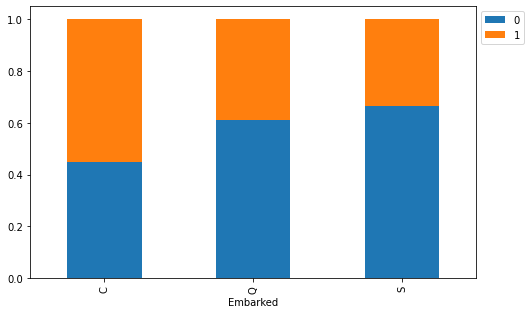

In [18]:
stacked_barplot(train_data, "Embarked", "Survived")

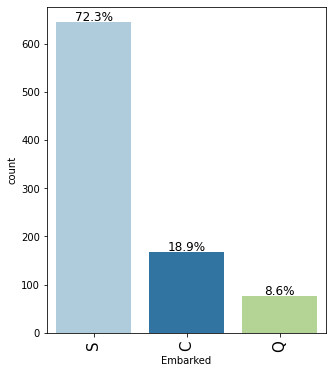

In [19]:
labeled_barplot(train_data, "Embarked", perc=True)

It appears like people with Cherbourg as the Port of Embarkation were more likely to survive compared to Queenstown and Southampton. 

Given that we only have 2 null values in the train data and Southampton encompasses almost three-fourths of the train data, I'm ok with replacing the null values with Southampton.

In [20]:
train_data['Embarked'].replace(np.nan,"S",inplace=True)

##### Does sex have an impact on the survival rate of a person?

Survived    0    1  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
------------------------------------------------------------------------------------------------------------------------


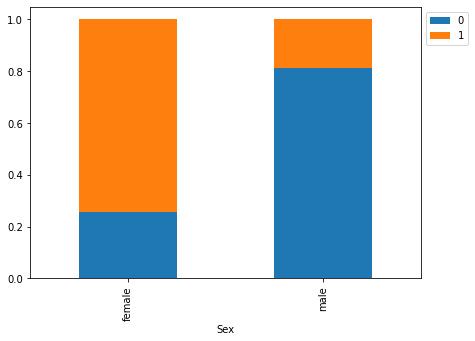

In [21]:
stacked_barplot(train_data, "Sex", "Survived")

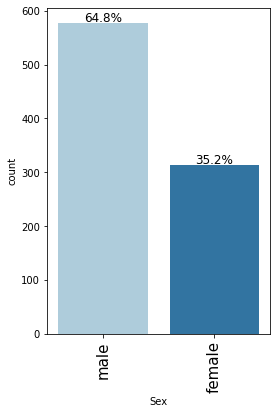

In [22]:
labeled_barplot(train_data, "Sex", perc=True)

The distribution of sex on the Titanic was about two-thirds male and one-third female. However, the survival percentage was a lot higher for females than males. 
This is consistent with the movie, where women and children were prioritized escape!

##### How many attendees on the ship had others in their party?

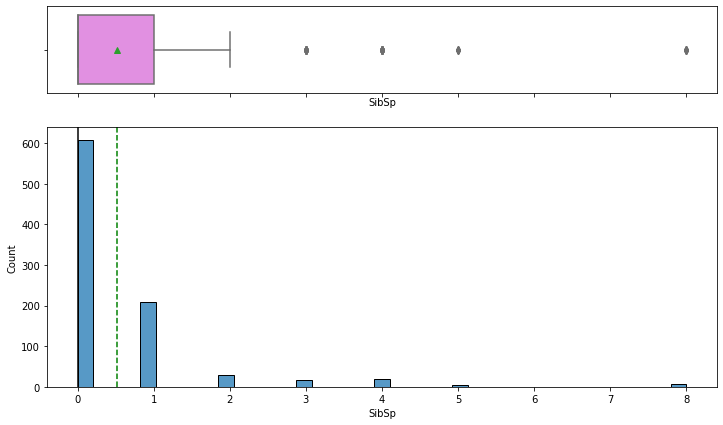

In [23]:
histogram_boxplot(train_data, "SibSp")

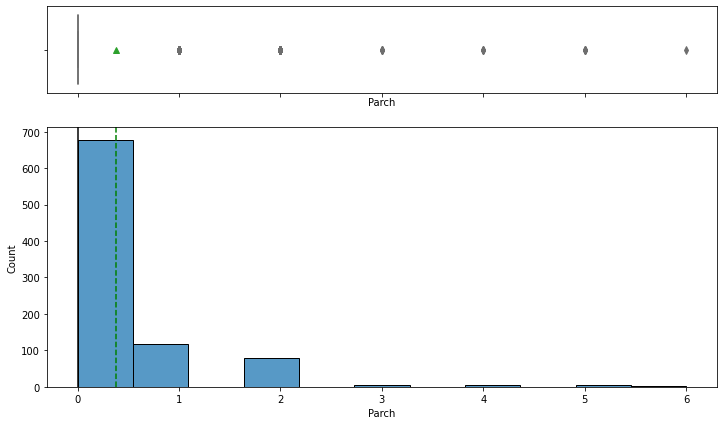

In [24]:
histogram_boxplot(train_data, "Parch")

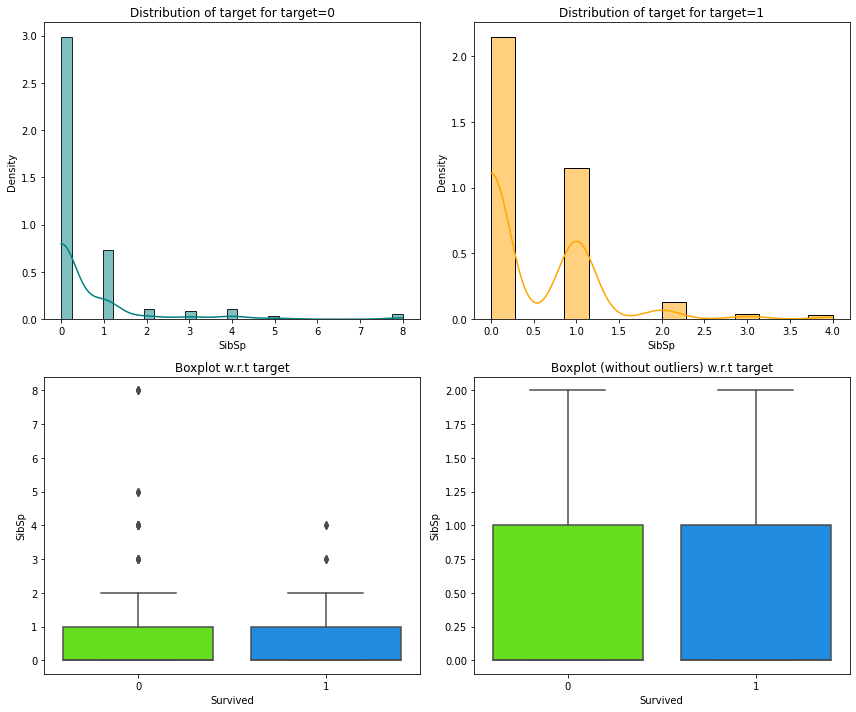

In [25]:
distribution_plot_wrt_target(train_data,"SibSp","Survived")

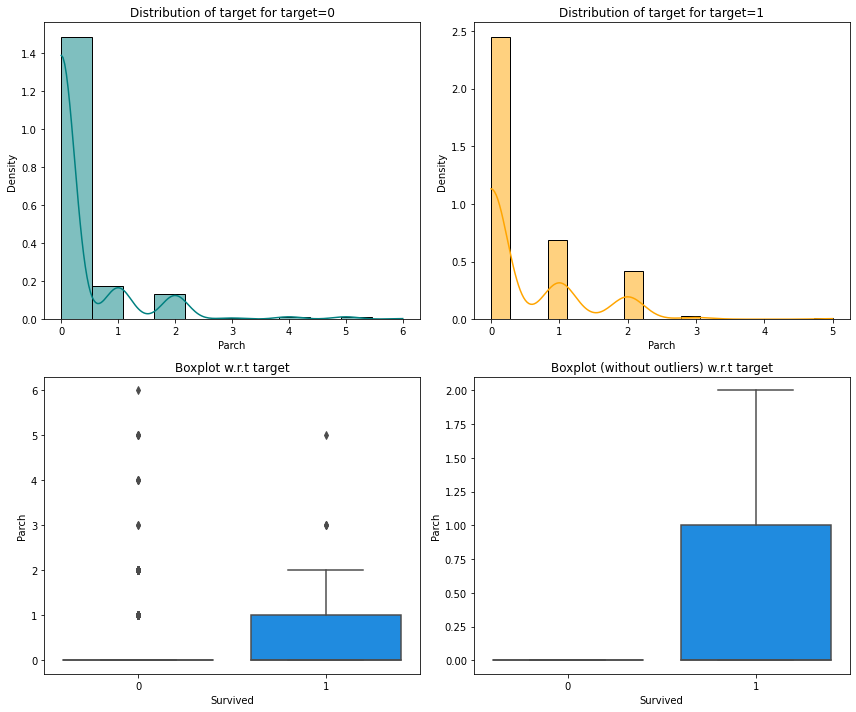

In [26]:
distribution_plot_wrt_target(train_data,"Parch","Survived")

Most attendees on the ship were alone. This is likely skewed to 0 because the data set includes crew members as well.

There appears to be no correlation between number of siblings/spouses and survival rate.
However, people with parents/children seem to be more likely to survive.



Let's briefly assume that a crew member could be identified by if the Fare was 0. Would this change the distribution and survival status?

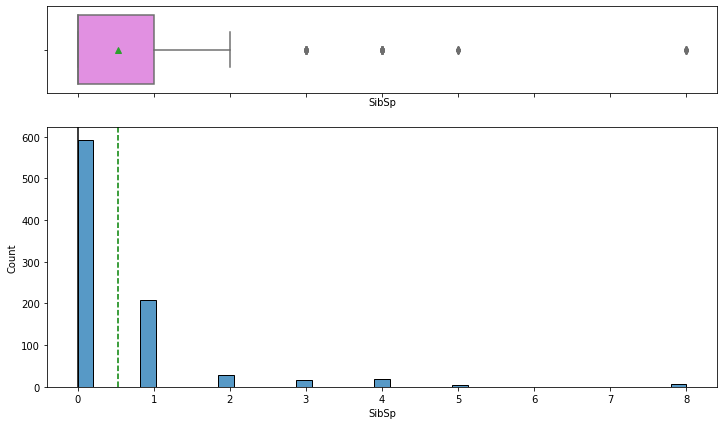

In [27]:
histogram_boxplot(train_data[train_data["Fare"]!=0], "SibSp")

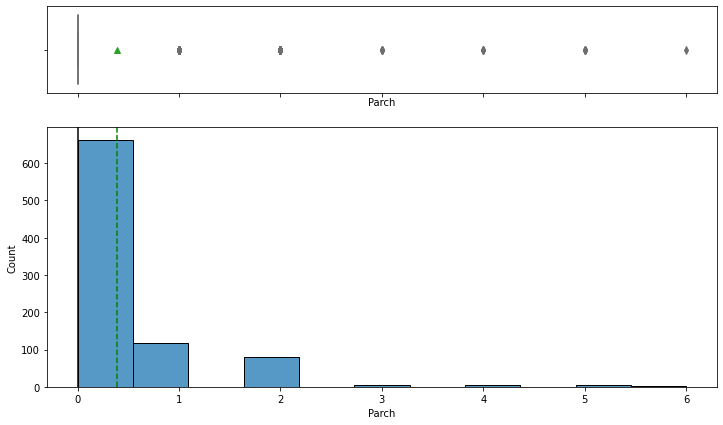

In [28]:
histogram_boxplot(train_data[train_data["Fare"]!=0], "Parch")

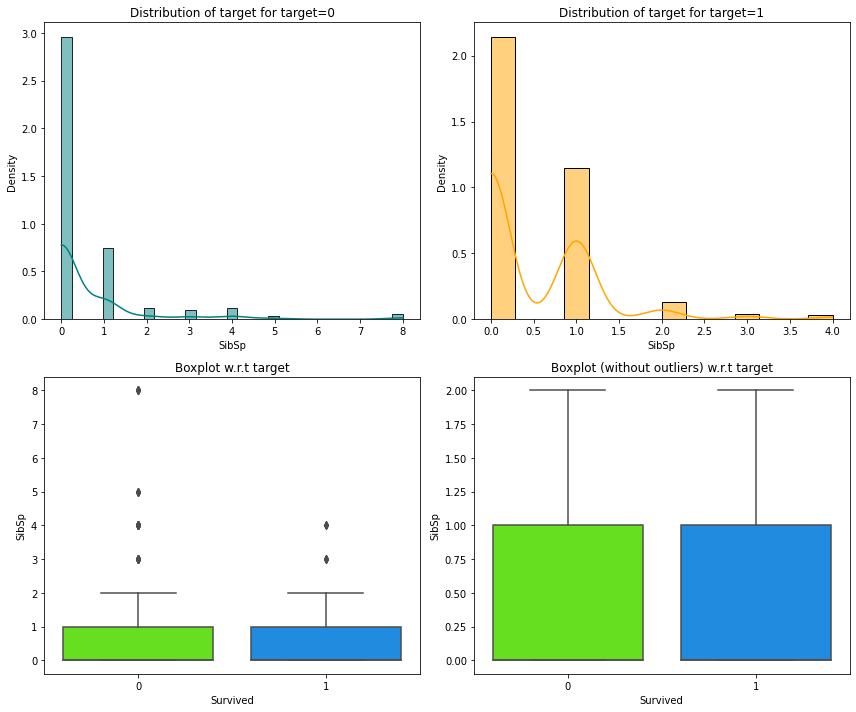

In [29]:
distribution_plot_wrt_target(train_data[train_data["Fare"]!=0],"SibSp","Survived")

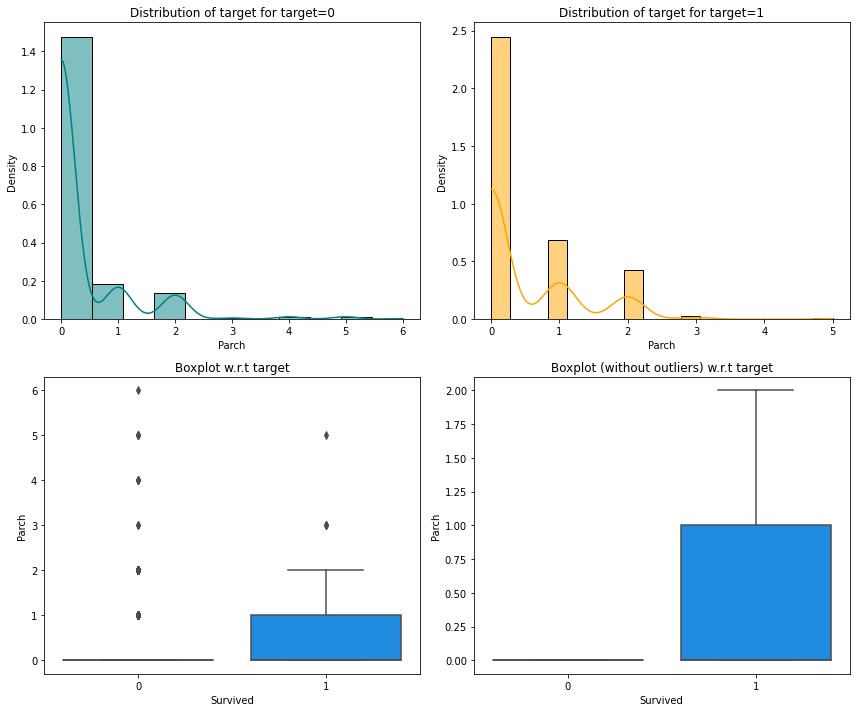

In [30]:
distribution_plot_wrt_target(train_data[train_data["Fare"]!=0],"Parch","Survived")

After removing rows where Fare was zero (because they were assumed as crew members), there didn't appear to be a major change in the distribution and survival status.

Beyond Fare = zero, is there an correlation for Fare with survival rate?



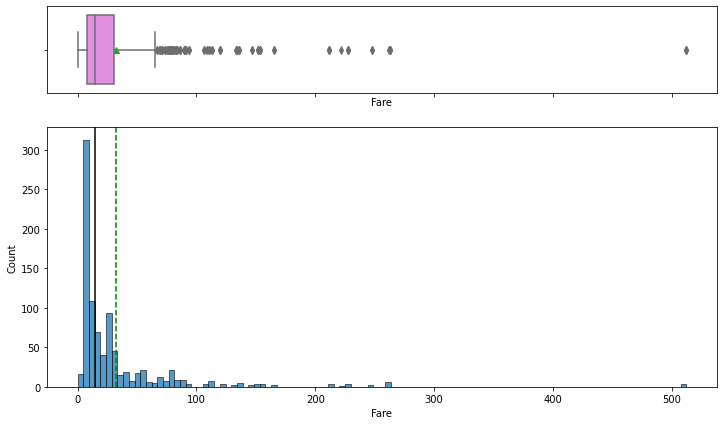

In [31]:
histogram_boxplot(train_data, "Fare")

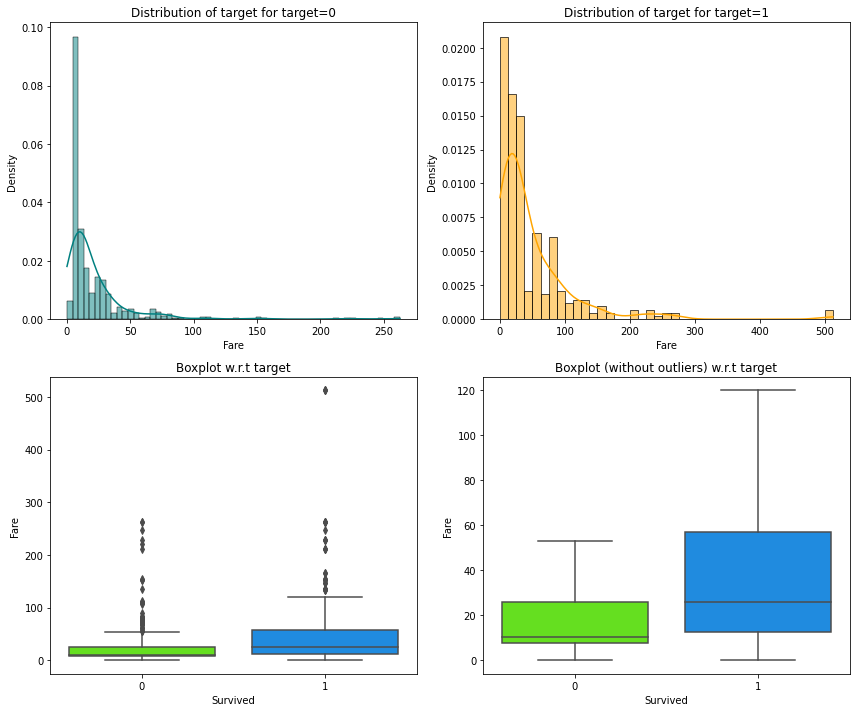

In [32]:
distribution_plot_wrt_target(train_data,"Fare","Survived")

Generally, those that paid a higher fare were more likely to survive.

##### Is there a correlation between Pclass and Fare?

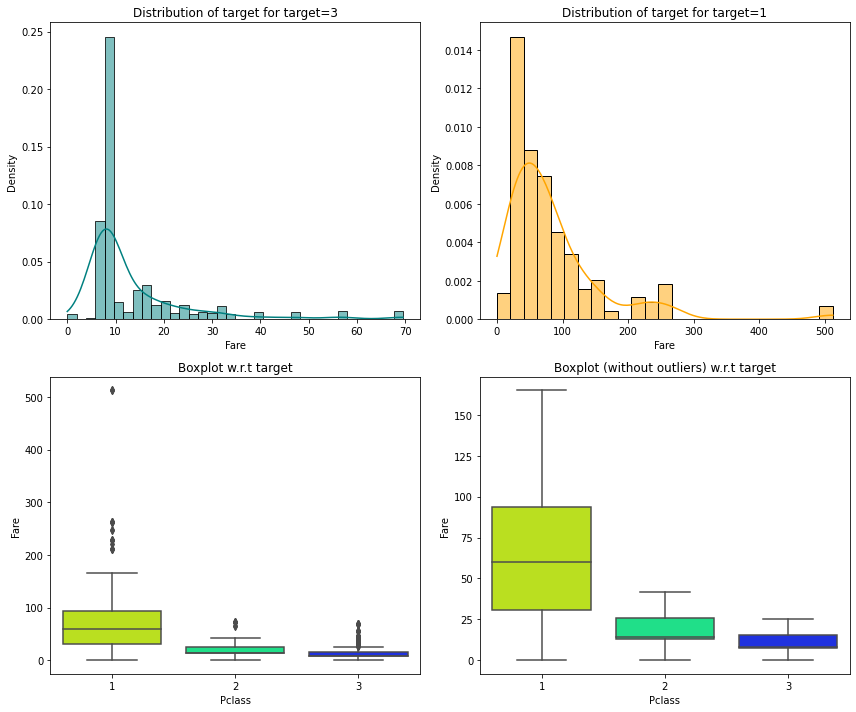

In [33]:
distribution_plot_wrt_target(train_data,"Fare","Pclass")

Yes, people in a ticket class of 1 generally paid a higher fare. People in a ticket class of 3 generally paid the lowest for fare. These may be multicollinear variables.

Now that we got a good understanding and visualization of the data and we cleaned appropriate places, let's prepare the data for modeling!

# Data Preparation

In [34]:
X_train = train_data.drop(["Survived"],axis=1)
y_train = train_data["Survived"]

# Logistic Regression Modeling

Logistic Regression modeling will require a little more data preparation. We need to add a constant and one-hot encode categorical variables.

In [35]:
# adding a contstant to X variable
X_log1 = add_constant(X_train)

# creating dummies
X_log1 = pd.get_dummies(X_log1, drop_first=True)

In [36]:
# fitting the model on training set
logit1 = sm.Logit(y_train, X_log1.astype(float))
lg1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.440326
         Iterations 6


In [37]:
# let's print the logistic regression summary
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.3388
Time:                        17:35:05   Log-Likelihood:                -392.33
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.017e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2923      0.565      9.361      0.000       4.184       6.400
Pclass        -1.1023      0.144     -7.677      0.000      -1.384      -0.821
Age           -0.0397      0.008     -5.072      0.0

##### Observations:
- Embarked_Q, Parch, and Fare have high p-value, so there's likely some multicollinearity at play and it's likely worth removing some of them.

Before doing further enhancements to this model, let's check the model performance with a confusion matrix.

Generally, I care about decreasing false positives and false negatives equally. So I will primarily focus on using the F1 score to track model performance too.

We will also set a default threshold of 0.5.

In [38]:
def conf_matrix_and_scores(X_train, y_train, lg, threshold=0.5):
    """
    Make a confusion matrix and calculate metrics
    X_train: The X train data set
    y_train: The y train data set
    lg: the logistic regression model
    threshold: threshold to use for the model (default 0.5)
    """
    pred_train = lg.predict(X_train) > threshold
    pred_train = np.round(pred_train)
    cm = confusion_matrix(y_train, pred_train)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="g")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.show()
    
    print("Accuracy on training set : ", accuracy_score(y_train, pred_train))
    print("Recall on training set: ", recall_score(y_train, pred_train))
    print("Precision on training set: ", precision_score(y_train, pred_train))
    print("F1 score on training set: ", f1_score(y_train, pred_train))

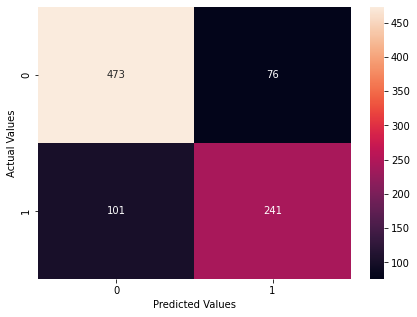

Accuracy on training set :  0.8013468013468014
Recall on training set:  0.7046783625730995
Precision on training set:  0.7602523659305994
F1 score on training set:  0.7314112291350531


In [39]:
conf_matrix_and_scores(X_log1, y_train, lg1)

An F1 score of 73% is good. But there are a good number of false positives and false negatives. Let's handle that better through some data cleaning. Starting with multicollinearity calculations.

In [40]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_log1.values, i) for i in range(X_log1.shape[1])],
    index=X_log1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const         33.600476
Pclass         1.765985
Age            1.210950
SibSp          1.282183
Parch          1.332584
Fare           1.649352
Sex_male       1.124899
Embarked_Q     1.496167
Embarked_S     1.461986
dtype: float64



Interestingly, there is no strong multicollinearity in the data. I expected at least Pclass or Fare to be related.

I will still remove the Embarked_Q column and make a new model.

In [41]:
X_log2 = X_log1.drop(["Embarked_Q"],axis=1)
logit2 = sm.Logit(y_train, X_log2.astype(float))
lg2 = logit2.fit()
print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.440329
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.3388
Time:                        17:35:07   Log-Likelihood:                -392.33
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.937e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2884      0.563      9.401      0.000       4.186       6.391
Pclass        -1.1046      0.

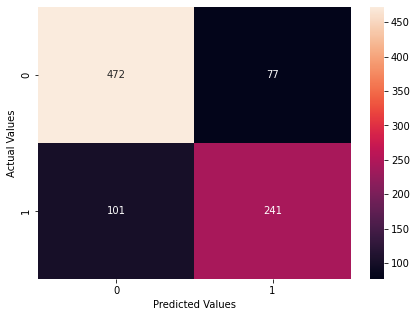

Accuracy on training set :  0.8002244668911336
Recall on training set:  0.7046783625730995
Precision on training set:  0.7578616352201258
F1 score on training set:  0.7303030303030302


In [42]:
conf_matrix_and_scores(X_log2, y_train, lg2)

As expected, p-values are still intact.

Let's go through our metrics calculations of this model.

No major change in metrics.

Parch has the highest p-value, so I will remove that now and model again.

In [43]:
X_log3 = X_log2.drop(["Parch"],axis=1)
logit = sm.Logit(y_train, X_log3.astype(float))
lg3 = logit.fit()
print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.440693
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.3382
Time:                        17:35:08   Log-Likelihood:                -392.66
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.440e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2802      0.561      9.418      0.000       4.181       6.379
Pclass        -1.1163      0.

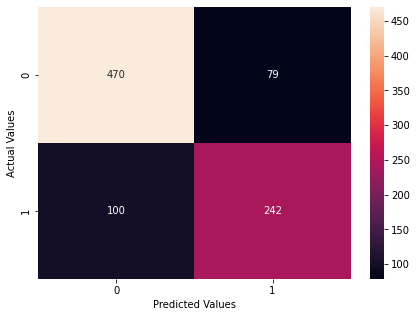

Accuracy on training set :  0.7991021324354658
Recall on training set:  0.7076023391812866
Precision on training set:  0.7538940809968847
F1 score on training set:  0.7300150829562594


In [44]:
conf_matrix_and_scores(X_log3, y_train, lg3)

No major change in metrics.

Fare sill has a high p-value, so I will remove that now and model again.

In [45]:
X_log4 = X_log3.drop(["Fare"],axis=1)
logit = sm.Logit(y_train, X_log4.astype(float))
lg4 = logit.fit()
print(lg4.summary())

Optimization terminated successfully.
         Current function value: 0.440965
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Jun 2022   Pseudo R-squ.:                  0.3378
Time:                        17:35:09   Log-Likelihood:                -392.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.941e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4595      0.498     10.954      0.000       4.483       6.436
Pclass        -1.1646      0.

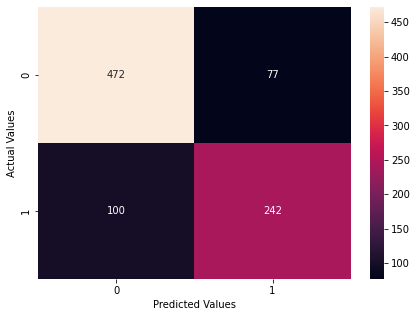

Accuracy on training set :  0.8013468013468014
Recall on training set:  0.7076023391812866
Precision on training set:  0.7586206896551724
F1 score on training set:  0.7322239031770046


In [46]:
conf_matrix_and_scores(X_log4, y_train, lg4)

We will keep lg4 as our logistic regression model. Let's intrepret what this model tells us.

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [47]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_log4.columns, columns=["odds"]).T

,const,Pclass,Age,SibSp,Sex_male,Embarked_S
odds,234.974407,0.312049,0.961016,0.715438,0.067173,0.641252


In [48]:
# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_log4.columns, columns=["change_odds%"]).T

,const,Pclass,Age,SibSp,Sex_male,Embarked_S
change_odds%,23397.440734,-68.795122,-3.898353,-28.456217,-93.282737,-35.874839


##### Coefficient Interpretations:

- "Pclass": Holding all other features constant, a unit change in Pclass will decrease the odds of survival by 68.80%
- "Age": Holding all other features constant, a unit change in Age will decrease the odds of survival by 3.90%
- "SibSp": Holding all other features constant, a unit change in the number of siblings our spouses in your part will decrease the odds of survival by 28.46%
- "Sex": Holding all other features constant, being a male will decrease the odds of survival by 93.28%.
- "Embarked": Holding all other features constant, embarking from Southampton will decrease the odds of survival by 35.87%.

Let's see if we can enhance the model further with another threshold value.

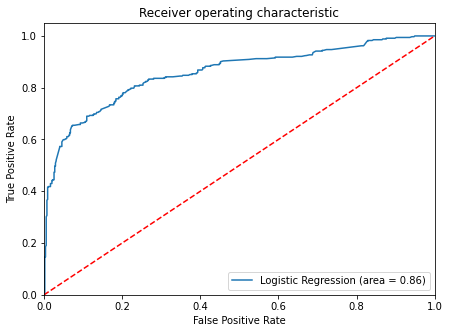

In [49]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_log4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_log4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

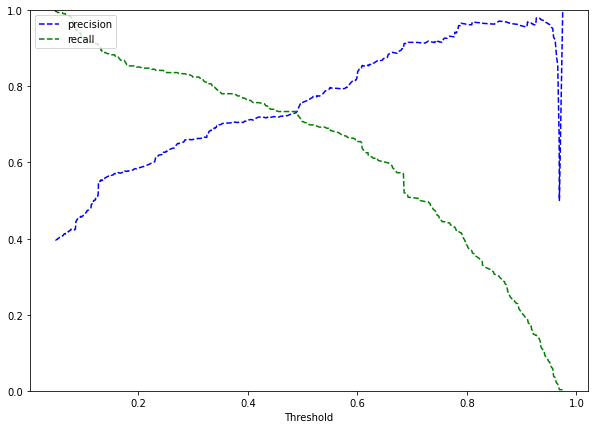

In [50]:
y_scores = lg4.predict(X_log4)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

0.5 does seem to be the ideal value for the threshold. We'll keep as is.

Now let's explore a decision tree model!

# Decision Tree Modeling

In [51]:
# creating dummies
X_dt = pd.get_dummies(X_train, drop_first=True)

dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(X_dt, y_train)

DecisionTreeClassifier(random_state=1)

We can actually use the same metric calculation function that was used in logistic regression.

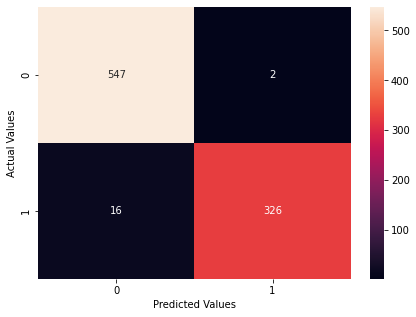

Accuracy on training set :  0.9797979797979798
Recall on training set:  0.9532163742690059
Precision on training set:  0.9939024390243902
F1 score on training set:  0.973134328358209


In [52]:
conf_matrix_and_scores(X_dt, y_train, dt1)

This decision tree model looks great, but a problem with this type of modeling is that it is prone to overfitting.

Let's make another decision tree model with a balanced class weight.

In [53]:
dt2 = DecisionTreeClassifier(random_state=1, class_weight="balanced") 
dt2.fit(X_dt, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

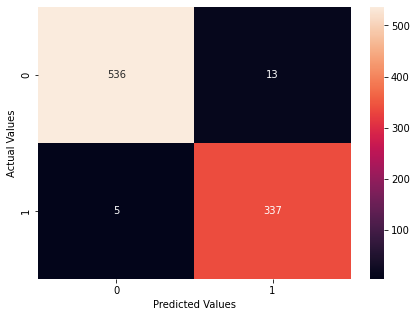

Accuracy on training set :  0.9797979797979798
Recall on training set:  0.9853801169590644
Precision on training set:  0.9628571428571429
F1 score on training set:  0.9739884393063584


In [54]:
conf_matrix_and_scores(X_dt, y_train, dt2)

Let's visualize what this model looks like.

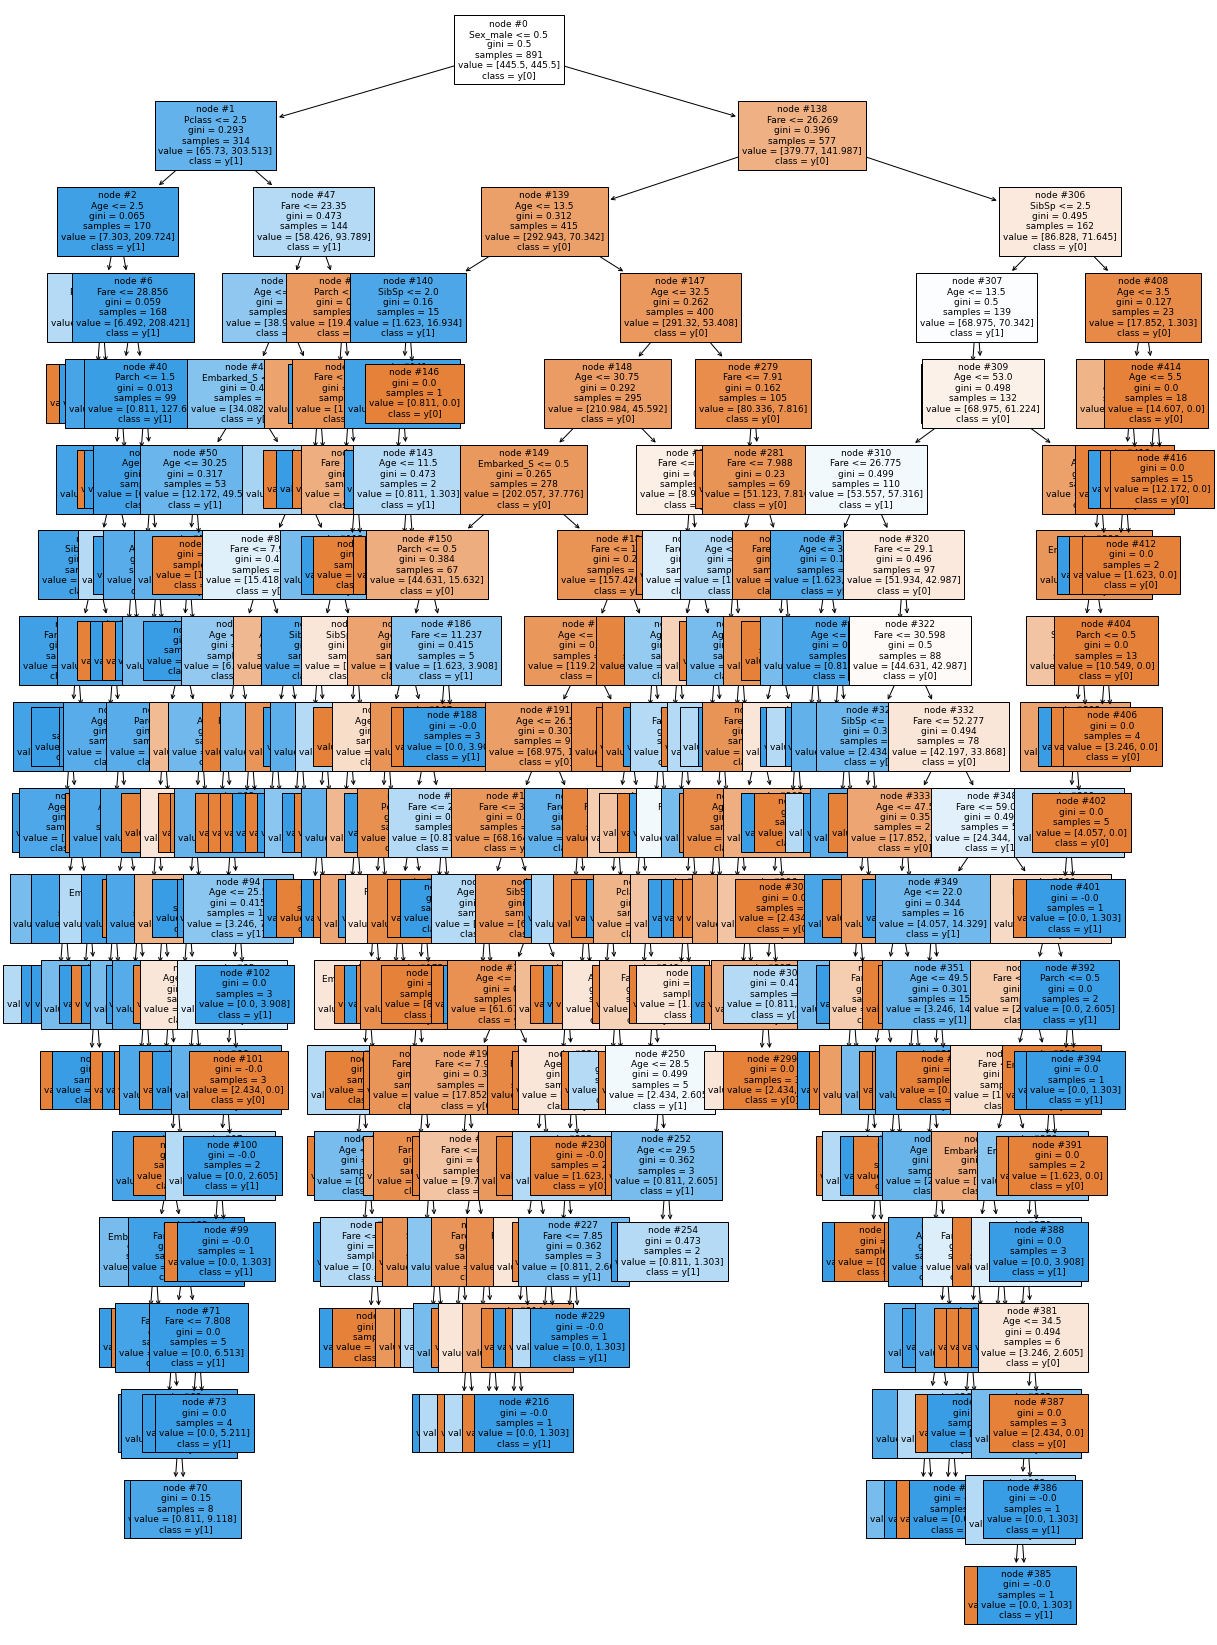

In [55]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dt2,
    feature_names=list(X_dt.columns),
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

There is clearly a lot of nodes here, clearly overcomplex and overfitting so it should be pruned.

First, let's get a review of the variable importances.

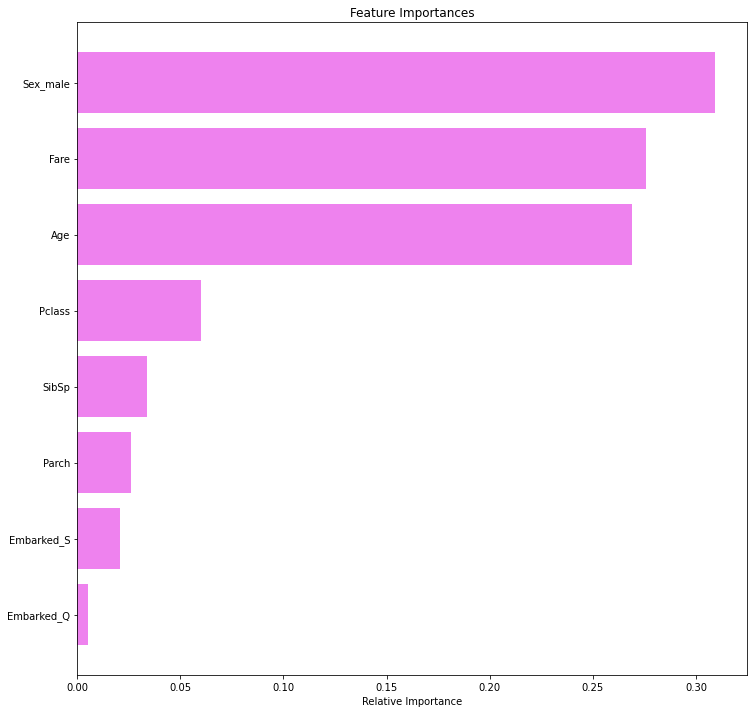

In [56]:
importances = dt2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [list(X_dt.columns)[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Sex, Fare, and Age were the highest contributors to the decision tree model. This is pretty different from the logistic regression model we solidified - let's see if this changes as we prune the decision tree model.

We'll start with pre-pruning. We will circle through the list of various hyperparameters until we get the one with the best F1 score.

In [57]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "criterion": ["entropy", "gini"],
    "max_depth": np.arange(2, 11, 2),   
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_dt, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_dt, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       min_impurity_decrease=1e-06, min_samples_split=30,
                       random_state=1)

Our iterative process showed us that the following would be ideal for a decision tree model:
* Criterion of entropy
* Max depth of 10
* Max leaf node number as 50
* Min samples needed to split as 30
* Min impurity decrease as 1e-6

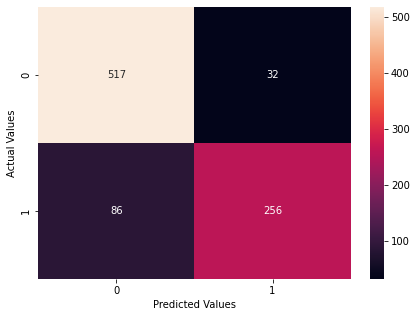

Accuracy on training set :  0.867564534231201
Recall on training set:  0.7485380116959064
Precision on training set:  0.8888888888888888
F1 score on training set:  0.8126984126984127


In [58]:
conf_matrix_and_scores(X_dt, y_train, estimator)

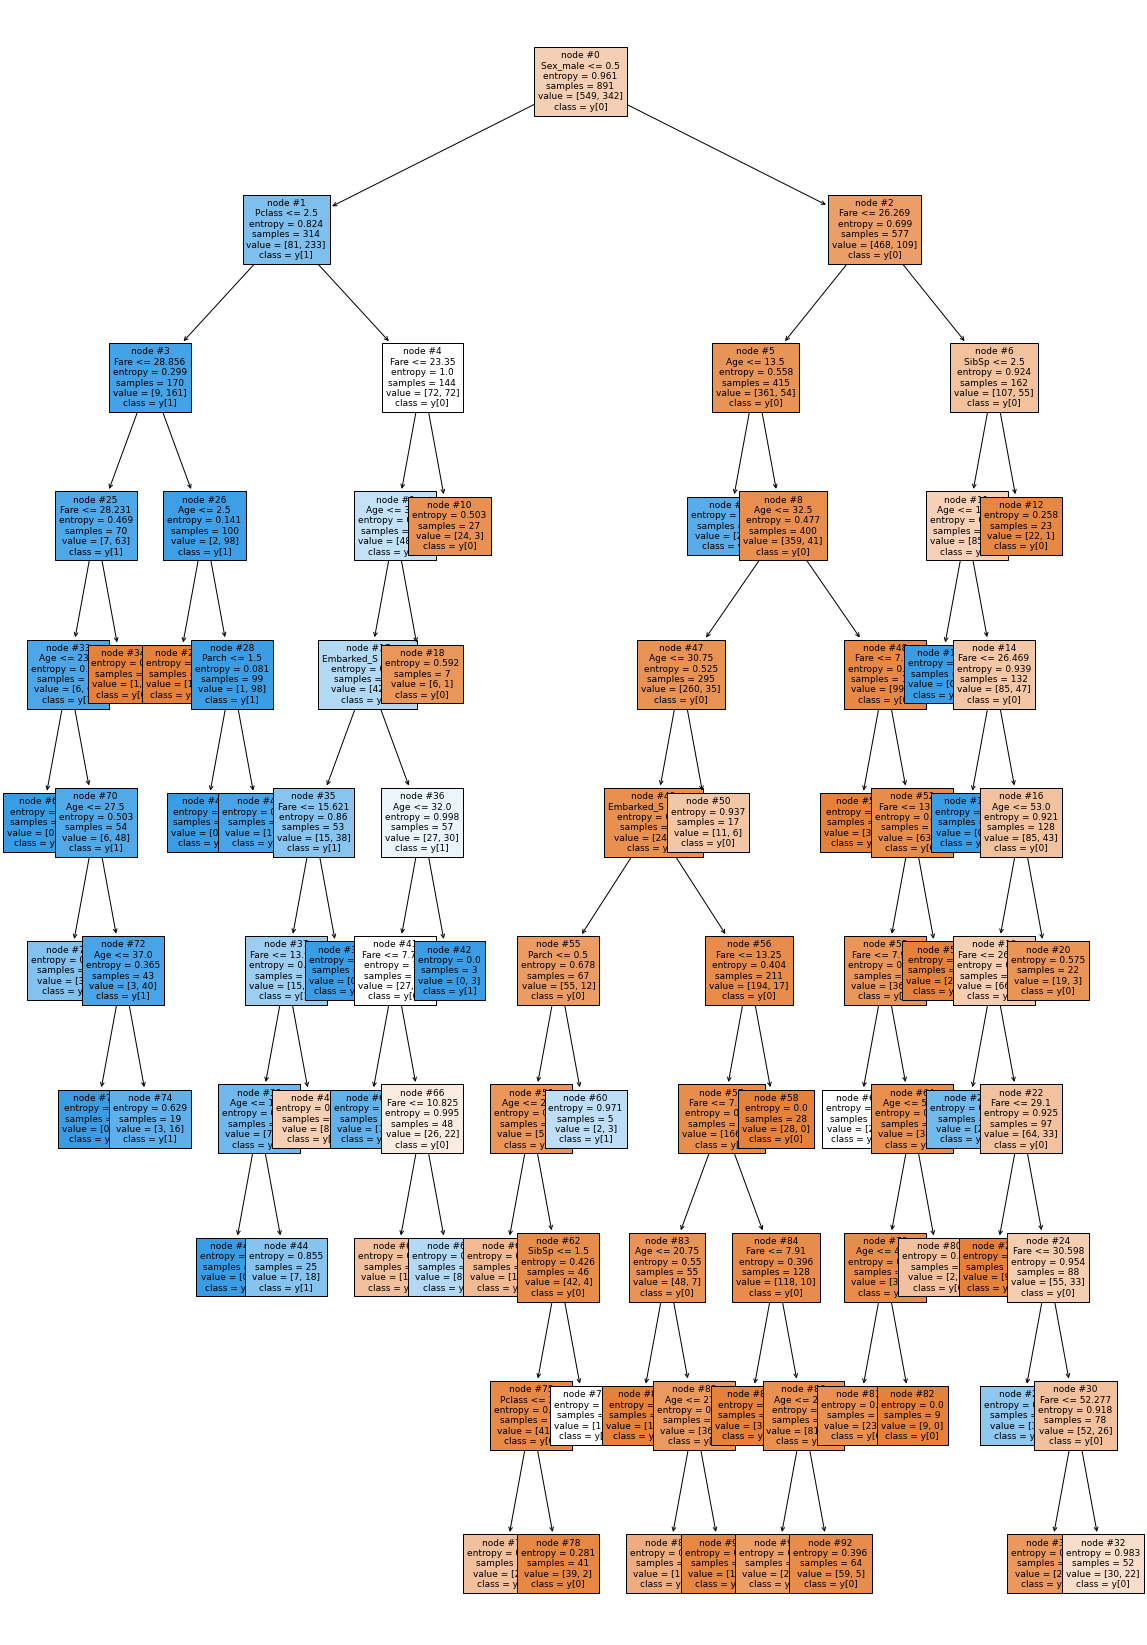

In [59]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    estimator,
    feature_names=list(X_dt.columns),
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

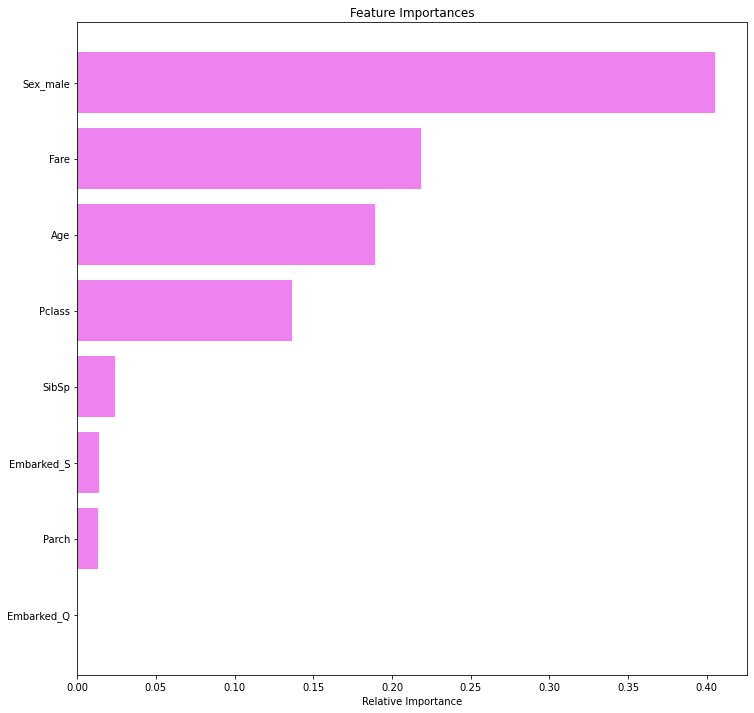

In [60]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [list(X_dt.columns)[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The pre-pruned model is a lot more simplified. The new F1 score is 81%, which is less than before but also is less prone to overfitting.
The pre-pruned model also prioritizes sex the most of all the features.

##### Cost Complexity Pruning:

Let's visualize the effect of the cost complexity parameter with the decision tree modeling. We will recursively find the node with the weakest link by returning the effective alphas and corresponding total leaf impurities at each step. 

In [61]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_dt, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [62]:
path = pd.DataFrame(path)
path

,ccp_alphas,impurities
0,0.000000,0.024427
1,0.000020,0.024447
2,0.000031,0.024478
3,0.000045,0.024524
4,0.000054,0.024578
5,0.000062,0.024640
6,0.000064,0.024704
7,0.000095,0.024893
8,0.000224,0.025342
9,0.000259,0.025860


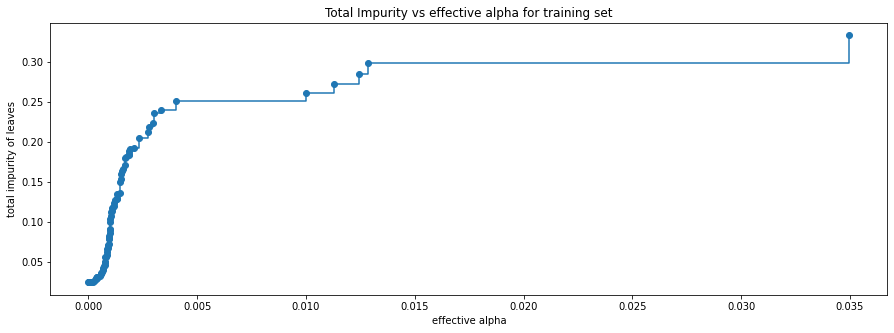

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Now we will train a decision tree to use the effective alphas. We'll find the alpha that provides the best F1 score.

In [64]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_dt, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1396479574728522


We should obviously remove the last value, because a decision tree with only 1 node doesn't provide any information.

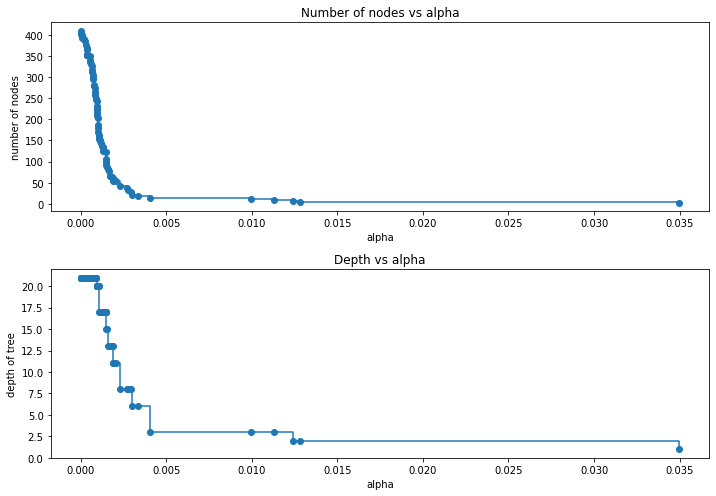

In [65]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

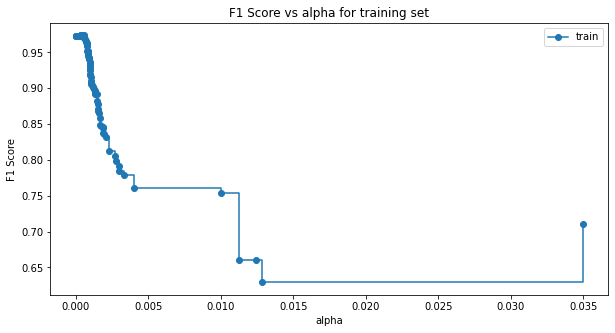

In [66]:
f1_train = []
for clf in clfs:
    pred_train=clf.predict(X_dt)
    values_train=metrics.f1_score(y_train,pred_train)
    f1_train.append(values_train)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training set")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.legend()
plt.show()

From the above graphs, it looks like an alpha of around 0.004 would be best. Higher than that will cause exponential changes to number of nodes and depth. Lower than that risks basing the model on noise and overfitting.
To get the exact number, I will grab from the 76th row of the path dataframe.

In [67]:
ideal_model=clfs[76]
print(ideal_model)

DecisionTreeClassifier(ccp_alpha=0.004035705107829868, random_state=1)


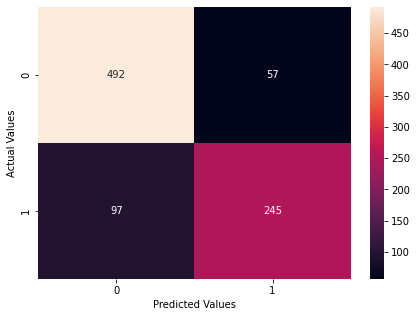

Accuracy on training set :  0.8271604938271605
Recall on training set:  0.716374269005848
Precision on training set:  0.8112582781456954
F1 score on training set:  0.7608695652173915


In [68]:
conf_matrix_and_scores(X_dt, y_train, ideal_model)

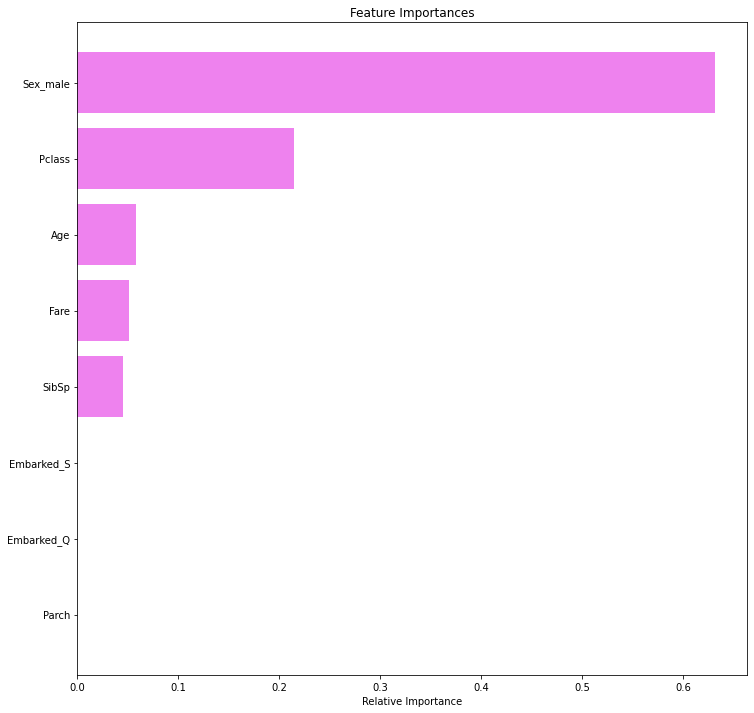

In [69]:
importances = ideal_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [list(X_dt.columns)[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

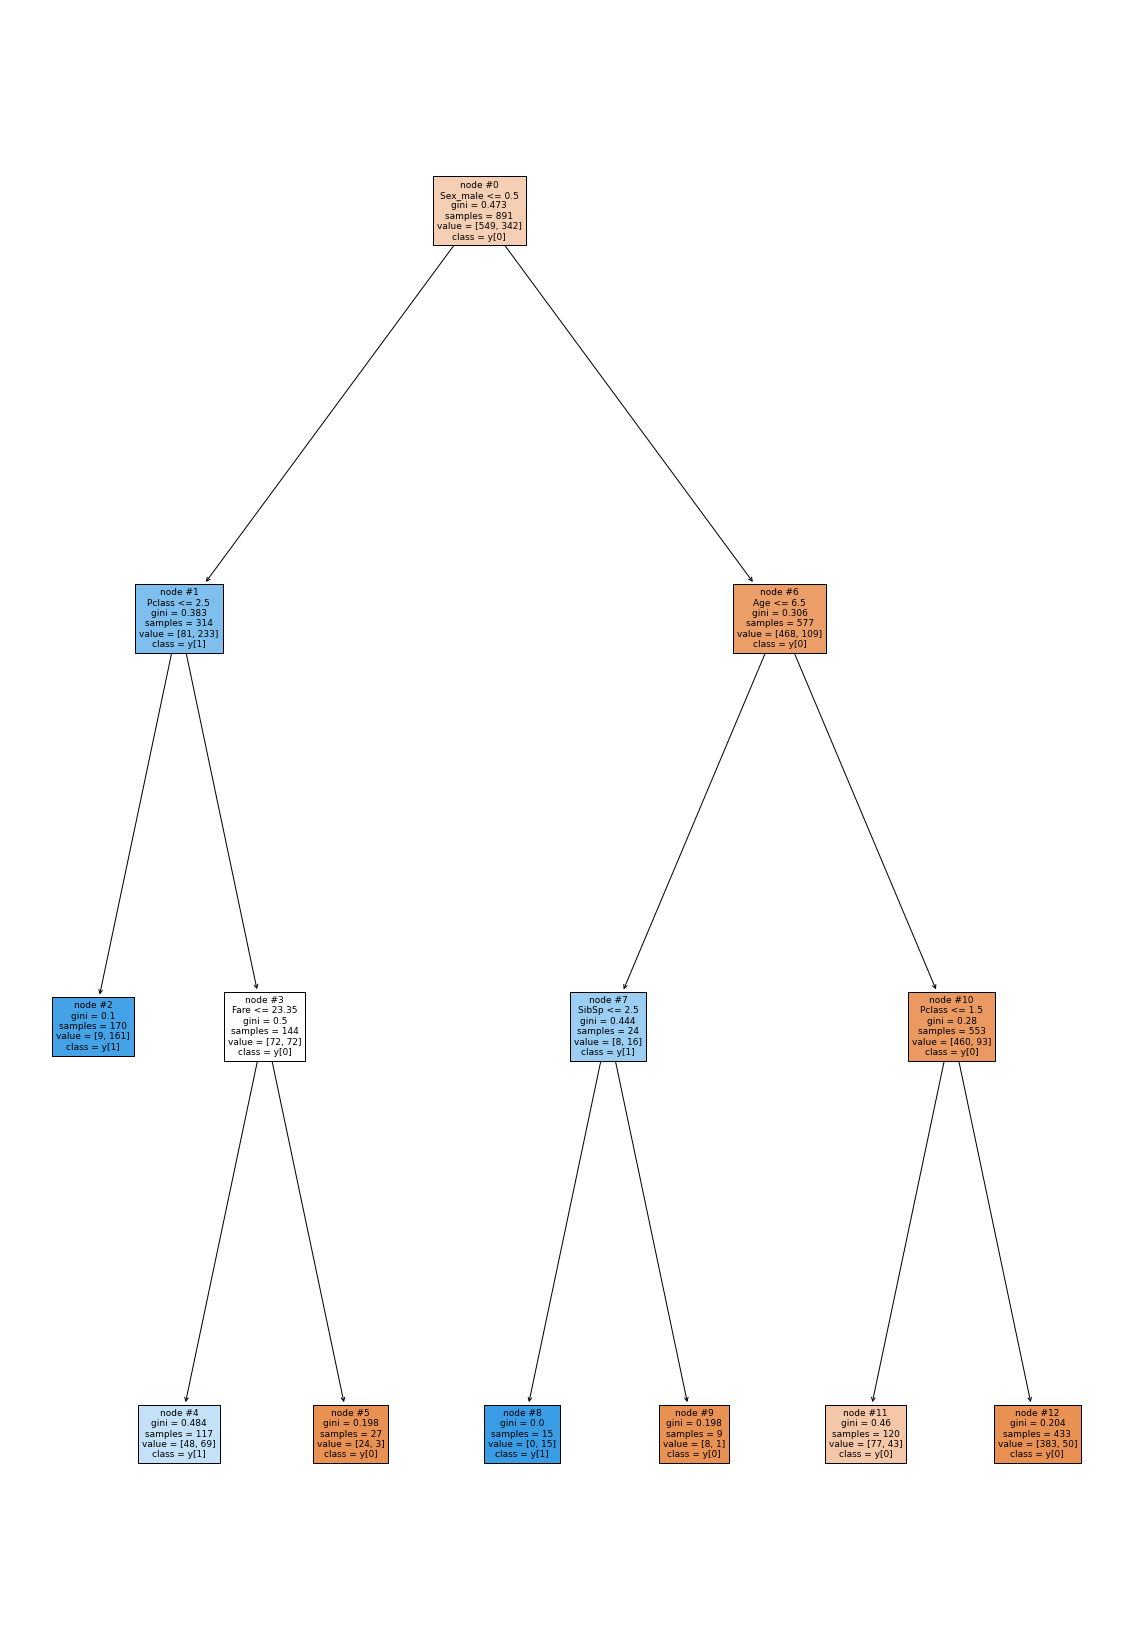

In [70]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    ideal_model,
    feature_names=list(X_dt.columns),
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Model Performance Comparison and Conclusions

- We'll use the post-pruned Decision Tree model for our test data set. This is chosen because it is a simple to understand model (depth of only 3 and only 7 leaf nodes) and yet it provides a solid F1 score of 76%.
- According to this model, the sex of the person is the strongest identifier for survival status, followed by Pclass. This makes sense because women were generally prioritized escape, and richer people probably had more power to influence prioritizing themselves over others.
- To make a stronger model, the following can be done for the future:
** Information about if someone was a guest or on the crew. This likely would be a strong factor, as crew members would have known the requirements to get to safety. This data can likely be gathered from other sources.
** We removed the Cabin column due to having many null values. However, this could be a strong factor too because those that lives lower in the ship would have had to go through more effort to not drown. We can try to find reliable information for this data in other sources, or model with only the rows that have this information.

# Running Model on Test Data

First, we need to clean the test data set in the same way that we did it for the train data set before modeling.
We will copy into a new data frame to avoid breaking the test data set.

In [71]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### Things to clean:
- Just like the train set, remove the columns for PassengerId, Name, Ticket, Cabin
- Replace null values for Age with the value of 30.
- No need to replace null values in the Embarked column because that already has all values populated.
- There is one row with a null Fare value. We will replace that with a 0 because that is the mode of the Fare column.
- One-hot encode the categorical variables.

In [73]:
# Remove the PassengerId, Name, Ticket, and Cabin columns
cols = ["PassengerId","Name","Ticket", "Cabin"]
X_testdt=test_data
for col in cols:
    X_testdt = X_testdt.drop([col], axis=1)
    
# Handle null values
X_testdt['Age'].replace(np.nan,30,inplace=True)
X_testdt['Fare'].replace(np.nan,0,inplace=True)
    
# One-hot encode variables
X_testdt = pd.get_dummies(X_testdt, drop_first=True)

In [74]:
# Confirm we have a test data set in the correct format and no null values
X_testdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [75]:
# Quick glance at part of the test data set.
X_testdt.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


Now we can make our submission file!

In [76]:
predictions = ideal_model.predict(X_testdt)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
